## Data Description:
The dataset used for this project is taken from historical data of Apple inc stock from 1st Jan 2020 to 28 Dec 2020.

## Goal(s):

1. Calculating a trading signal for AAPL

2. Analyzing and generating singla of AAPL

3. Generate buy/sell signal.

4. Visualization.

5. Train model with algorithm.
    

### Getting data from Yahoo Finance

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install yfinance

1. Import the libraries

In [43]:
import pandas as pd 
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt
import datetime

2. Download the data

In [44]:
# set start and end dates 
start_date = datetime.datetime(2021, 1, 1) 
end_date = datetime.datetime(2021, 12, 28) 
yahoo_df=yf.download('AAPL', 
                      
                       start_date, 
                       end_date,
                     interval='1h'
                       )
yahoo_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-01-04 09:30:00-05:00,133.570007,133.611603,130.380005,131.053604,131.053604,27653145
2021-01-04 10:30:00-05:00,131.054993,131.309998,129.399994,129.895004,129.895004,20134055
2021-01-04 11:30:00-05:00,129.889893,130.089996,126.760002,128.250000,128.250000,23694210
2021-01-04 12:30:00-05:00,128.246902,129.110001,127.630096,129.039795,129.039795,14745063
2021-01-04 13:30:00-05:00,129.039993,129.199997,128.595001,128.960007,128.960007,10861778
...,...,...,...,...,...,...
2021-12-27 11:30:00-05:00,178.729996,179.330002,178.429993,179.322205,179.322205,7597198
2021-12-27 12:30:00-05:00,179.320099,179.664993,178.929993,179.600098,179.600098,6958511
2021-12-27 13:30:00-05:00,179.605804,180.229996,179.589996,180.125000,180.125000,8246181
2021-12-27 14:30:00-05:00,180.124893,180.134995,179.535004,179.910004,179.910004,7847404


In [45]:
yahoo_df.drop(yahoo_df.tail(1).index,inplace=True)

In [46]:
yahoo_df.tail(30)

,Open,High,Low,Close,Adj Close,Volume
2021-12-20 13:30:00-05:00,169.421005,170.289993,169.184998,169.598404,169.598404,9490330
2021-12-20 14:30:00-05:00,169.589996,170.429993,169.360001,169.779999,169.779999,9268551
2021-12-20 15:30:00-05:00,169.770004,170.190002,169.089996,169.910004,169.910004,10243967
2021-12-21 09:30:00-05:00,171.554993,172.320007,169.350006,169.572906,169.572906,21794239
2021-12-21 10:30:00-05:00,169.585007,170.699997,169.119995,170.299103,170.299103,10926527
2021-12-21 11:30:00-05:00,170.300003,171.539993,170.139999,171.485001,171.485001,9628582
2021-12-21 12:30:00-05:00,171.490005,171.529999,170.660004,170.961197,170.961197,7513019
2021-12-21 13:30:00-05:00,170.975098,172.089996,170.809998,172.080002,172.080002,8356597
2021-12-21 14:30:00-05:00,172.080002,173.039993,172.020004,172.576996,172.576996,11188689
2021-12-21 15:30:00-05:00,172.574997,173.199997,172.190994,172.979996,172.979996,8215582


In [47]:
yahoo_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

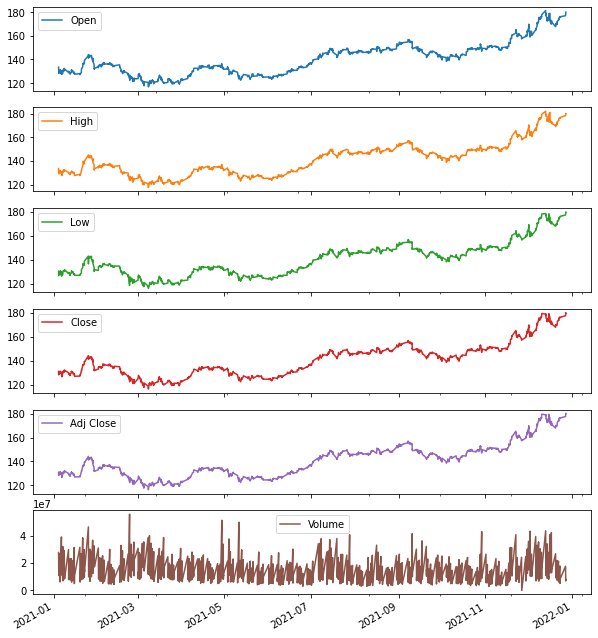

In [48]:
# Visualize the complete dataset
yahoo_df.plot(figsize=(10,12),subplots=True);

In [49]:
#looking at some meta information about dataframe
yahoo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1732 entries, 2021-01-04 09:30:00-05:00 to 2021-12-27 14:30:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1732 non-null   float64
 1   High       1732 non-null   float64
 2   Low        1732 non-null   float64
 3   Close      1732 non-null   float64
 4   Adj Close  1732 non-null   float64
 5   Volume     1732 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 94.7 KB


In [52]:
#looking at useful standard statistics per column
yahoo_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1.732000e+03
mean,140.300500,140.788140,139.801493,140.314545,140.314545,1.143907e+07
std,13.792684,13.870682,13.761591,13.822862,13.822862,7.165647e+06
min,116.815002,117.389999,116.209999,116.400002,116.400002,0.000000e+00
25%,128.821251,129.327503,128.235001,128.869625,128.869625,6.689011e+06
50%,139.689949,140.313049,139.180000,139.724945,139.724945,9.208596e+06
75%,148.672428,149.025002,148.252499,148.654945,148.654945,1.355217e+07
max,181.470001,182.130005,179.589996,180.125000,180.125000,5.563519e+07


In [53]:
yahoo_df[yahoo_df.duplicated(keep=False)]


,Open,High,Low,Close,Adj Close,Volume


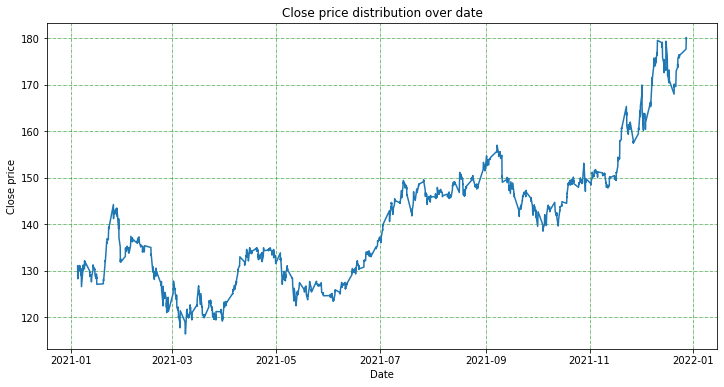

In [54]:
# Plot the close price
plt.figure(figsize=(12,6))
plt.plot(yahoo_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Close price distribution over date')
plt.grid(True, color = "green", linewidth = "0.5", linestyle = "-.")

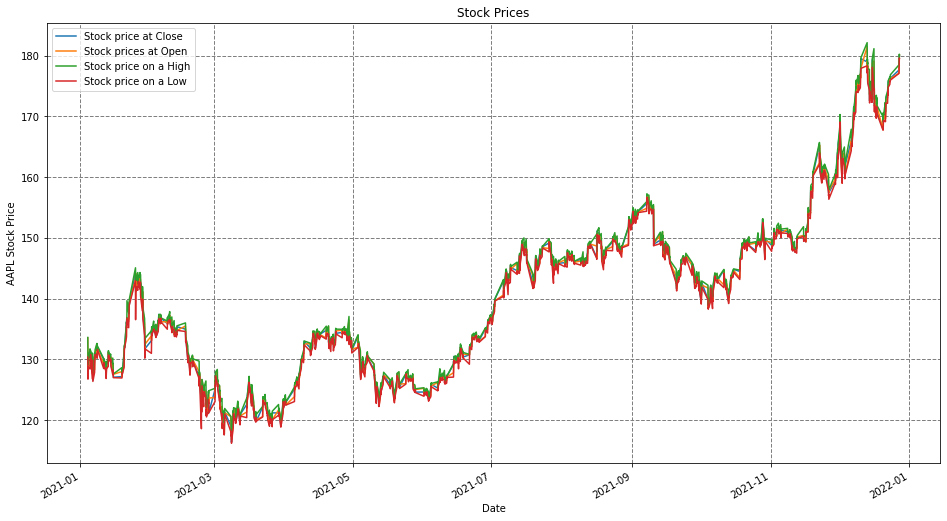

In [55]:
plt.figure(figsize=(16,9))
yahoo_df['Close'].plot(label='Stock price at Close')
yahoo_df['Open'].plot(label='Stock prices at Open')
yahoo_df['High'].plot(label='Stock price on a High')
yahoo_df['Low'].plot(label='Stock price on a Low')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.title('Stock Prices')
plt.legend()
plt.grid(True, color = "grey", linewidth = "1", linestyle = "--")

### Resampling data

In [56]:
data=yahoo_df.resample('D',label='left').agg({'Open':'first','High':'max','Low':'min','Close':'last'})
data

,Open,High,Low,Close
2021-01-04 00:00:00-05:00,133.570007,133.611603,126.760002,129.410004
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,130.949997
2021-01-06 00:00:00-05:00,127.625000,131.049896,126.382004,126.589996
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.879997,130.860001
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,131.990005
...,...,...,...,...
2021-12-23 00:00:00-05:00,175.850006,176.849899,175.270004,176.289993
2021-12-24 00:00:00-05:00,NaN,NaN,NaN,NaN
2021-12-25 00:00:00-05:00,NaN,NaN,NaN,NaN
2021-12-26 00:00:00-05:00,NaN,NaN,NaN,NaN


In [57]:
data=data.dropna()
data

,Open,High,Low,Close
2021-01-04 00:00:00-05:00,133.570007,133.611603,126.760002,129.410004
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,130.949997
2021-01-06 00:00:00-05:00,127.625000,131.049896,126.382004,126.589996
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.879997,130.860001
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,131.990005
...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,170.580002,167.720093,169.910004
2021-12-21 00:00:00-05:00,171.554993,173.199997,169.119995,172.979996
2021-12-22 00:00:00-05:00,173.039993,175.860001,172.149994,175.630005
2021-12-23 00:00:00-05:00,175.850006,176.849899,175.270004,176.289993


<AxesSubplot:>

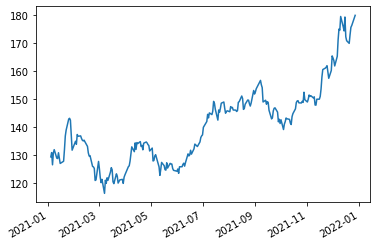

In [58]:
data['Close'].plot()

### Calculate the moving average

In [59]:
# Strategy parameters
long_window=20
short_window=50

# create 20 days simple moving average column
data['20_SMA'] = data['Close'].rolling(window=long_window, min_periods = 1).mean()

# create 50 days simple moving average column
data['50_SMA'] = data['Close'].rolling(window=short_window, min_periods = 1).mean()

In [60]:
data.head()

,Open,High,Low,Close,20_SMA,50_SMA
2021-01-04 00:00:00-05:00,133.570007,133.611603,126.760002,129.410004,129.410004,129.410004
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,130.949997,130.180000,130.180000
2021-01-06 00:00:00-05:00,127.625000,131.049896,126.382004,126.589996,128.983332,128.983332
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.879997,130.860001,129.452499,129.452499
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,131.990005,129.960001,129.960001


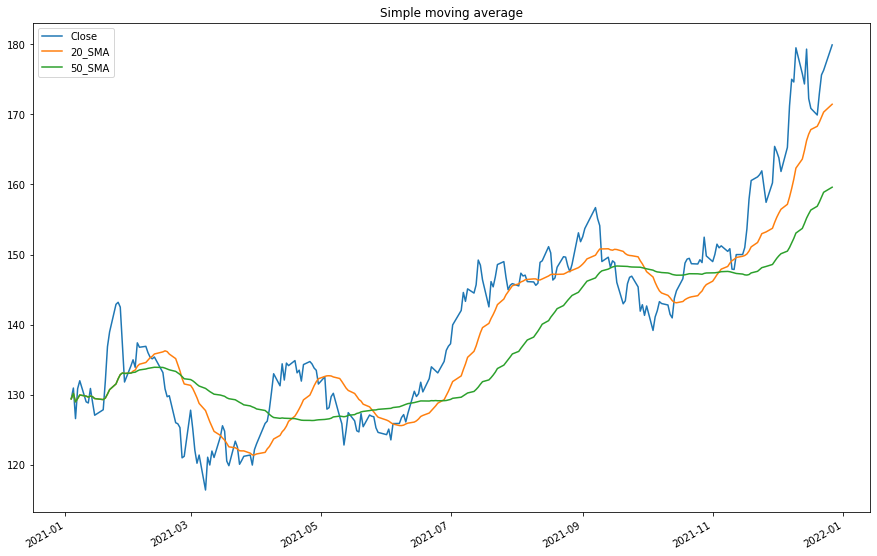

In [61]:
data[['Close','20_SMA','50_SMA']].plot(figsize=(15,10),title='Simple moving average');

In [62]:
data.head(20)

,Open,High,Low,Close,20_SMA,50_SMA
2021-01-04 00:00:00-05:00,133.570007,133.611603,126.760002,129.410004,129.410004,129.410004
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,130.949997,130.180000,130.180000
2021-01-06 00:00:00-05:00,127.625000,131.049896,126.382004,126.589996,128.983332,128.983332
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.879997,130.860001,129.452499,129.452499
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,131.990005,129.960001,129.960001
2021-01-11 00:00:00-05:00,129.190002,130.169998,128.500000,128.979996,129.796666,129.796666
2021-01-12 00:00:00-05:00,128.794998,129.690002,126.860001,128.819901,129.657128,129.657128
2021-01-13 00:00:00-05:00,128.931702,131.449997,128.869995,130.889999,129.811237,129.811237
2021-01-14 00:00:00-05:00,130.500000,130.869995,128.759995,128.910004,129.711100,129.711100
2021-01-15 00:00:00-05:00,128.779999,130.224197,127.000000,127.070000,129.446990,129.446990


### 1. Calculate a trading signal
* A moving average is simply a rolling series of arithmetic averages which acts as a smoothing mechanism to indicate trends in historic data. In financial markets that historic data is most likely to be prices or returns

In [63]:
# Calculate trading signals

# long signal
data['long_signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1.0, 0.0)

# Short signal
data['short_signal'] = np.where(data['20_SMA'] < data['50_SMA'], -1.0, 0.0)

data['signals']=data['long_signal'] + data['short_signal']

In [64]:
data.head(30)

,Open,High,Low,Close,20_SMA,50_SMA,long_signal,short_signal,signals
2021-01-04 00:00:00-05:00,133.570007,133.611603,126.760002,129.410004,129.410004,129.410004,0.0,0.0,0.0
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,130.949997,130.180000,130.180000,0.0,0.0,0.0
2021-01-06 00:00:00-05:00,127.625000,131.049896,126.382004,126.589996,128.983332,128.983332,0.0,0.0,0.0
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.879997,130.860001,129.452499,129.452499,0.0,0.0,0.0
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,131.990005,129.960001,129.960001,0.0,0.0,0.0
2021-01-11 00:00:00-05:00,129.190002,130.169998,128.500000,128.979996,129.796666,129.796666,0.0,0.0,0.0
2021-01-12 00:00:00-05:00,128.794998,129.690002,126.860001,128.819901,129.657128,129.657128,0.0,0.0,0.0
2021-01-13 00:00:00-05:00,128.931702,131.449997,128.869995,130.889999,129.811237,129.811237,0.0,0.0,0.0
2021-01-14 00:00:00-05:00,130.500000,130.869995,128.759995,128.910004,129.711100,129.711100,0.0,0.0,0.0
2021-01-15 00:00:00-05:00,128.779999,130.224197,127.000000,127.070000,129.446990,129.446990,0.0,0.0,0.0


<AxesSubplot:>

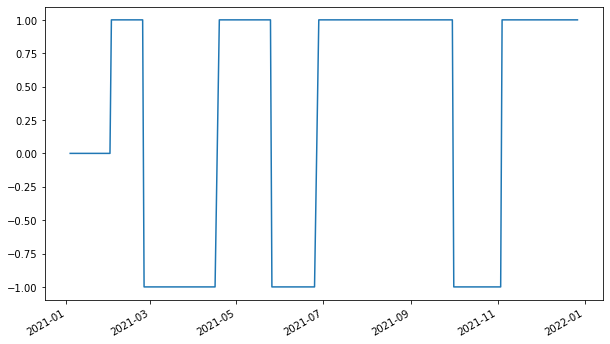

In [65]:
# Visualize signals
data['signals'].plot(figsize=(10, 6))

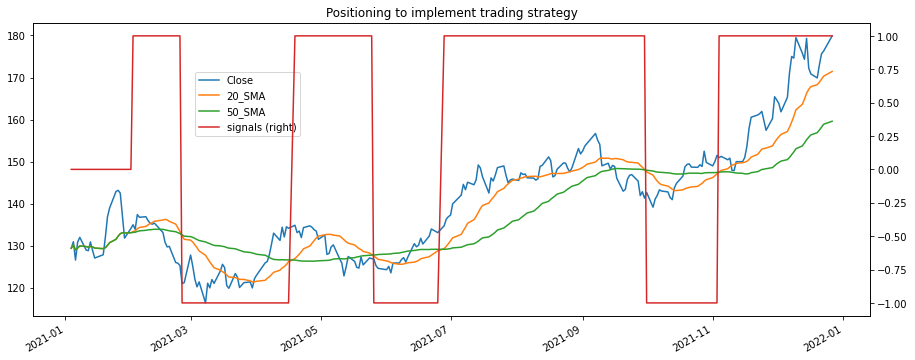

In [66]:
ax=data[['Close','20_SMA','50_SMA','signals']].plot(figsize=(15,6),title='Positioning to implement trading strategy',secondary_y='signals');
ax.get_legend().set_bbox_to_anchor((0.325,0.85))

* Crossover happens when the faster moving average and the slower moving average cross.

In [67]:
data.head()

,Open,High,Low,Close,20_SMA,50_SMA,long_signal,short_signal,signals
2021-01-04 00:00:00-05:00,133.570007,133.611603,126.760002,129.410004,129.410004,129.410004,0.0,0.0,0.0
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,130.949997,130.180000,130.180000,0.0,0.0,0.0
2021-01-06 00:00:00-05:00,127.625000,131.049896,126.382004,126.589996,128.983332,128.983332,0.0,0.0,0.0
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.879997,130.860001,129.452499,129.452499,0.0,0.0,0.0
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,131.990005,129.960001,129.960001,0.0,0.0,0.0


### Generate buy and sell signal

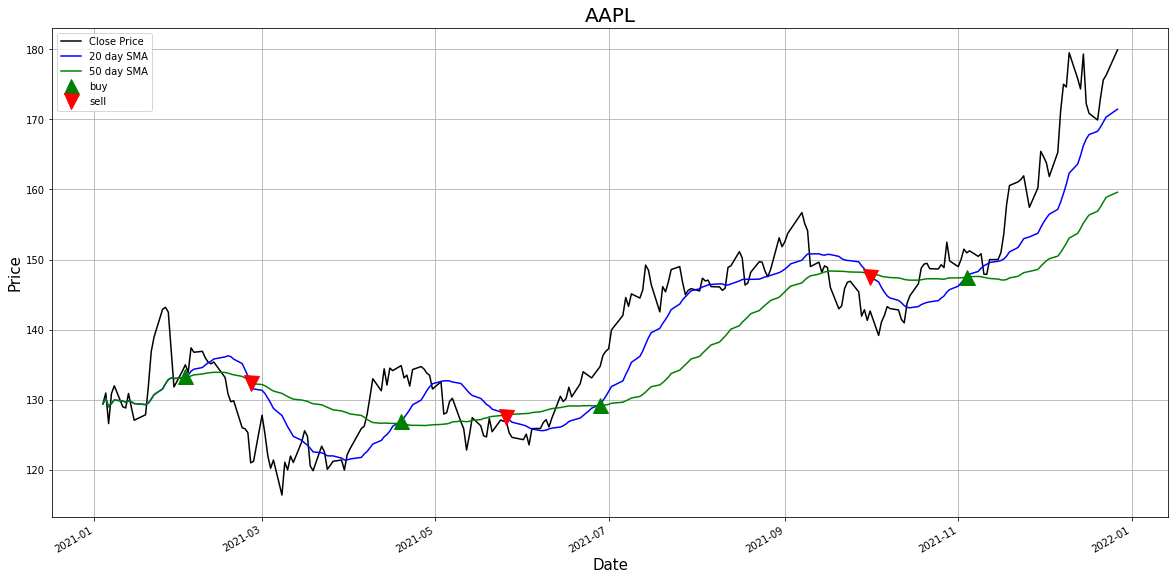

In [68]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close Price') 
data['20_SMA'].plot(color = 'b',label = '20 day SMA') 
data['50_SMA'].plot(color = 'g', label = '50 day SMA')
# plot ‘buy’ signals
plt.plot(data[(data['long_signal'] == 1) &  
         (data['long_signal'].shift(1) == 0)]['20_SMA'], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data[(data['short_signal'] == -1) &  
         (data['short_signal'].shift(1) == 0)]['20_SMA'], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AAPL', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## Backtest Strategy

In [27]:
data=data[['Open','Close','20_SMA','50_SMA']]
data

,Open,Close,20_SMA,50_SMA
2021-01-04 00:00:00-05:00,133.570007,129.410004,129.410004,129.410004
2021-01-05 00:00:00-05:00,128.889999,130.949997,130.180000,130.180000
2021-01-06 00:00:00-05:00,127.625000,126.589996,128.983332,128.983332
2021-01-07 00:00:00-05:00,128.360001,130.860001,129.452499,129.452499
2021-01-08 00:00:00-05:00,132.429993,131.990005,129.960001,129.960001
...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840


In [28]:
Starting_balance=10000
data['Return']=data.Close/data.Open
data['Bench_bal']=Starting_balance*data.Return.cumprod()
data

,Open,Close,20_SMA,50_SMA,Return,Bench_bal
2021-01-04 00:00:00-05:00,133.570007,129.410004,129.410004,129.410004,0.968855,9688.552562
2021-01-05 00:00:00-05:00,128.889999,130.949997,130.180000,130.180000,1.015983,9843.400841
2021-01-06 00:00:00-05:00,127.625000,126.589996,128.983332,128.983332,0.991890,9763.573566
2021-01-07 00:00:00-05:00,128.360001,130.860001,129.452499,129.452499,1.019476,9953.733537
2021-01-08 00:00:00-05:00,132.429993,131.990005,129.960001,129.960001,0.996678,9920.663119
...,...,...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240,1.012497,11036.946257
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840,1.008306,11128.623462
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240,1.014968,11295.193416
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840,1.002502,11323.454663


In [29]:
bench_return=round(((data.Bench_bal[-1]/data.Bench_bal[0])-1)*100,2)
bench_return

18.74

In [30]:
#calculate drawdawn
data['bench_peak']=data['Bench_bal'].cummax()
data['DD']=data.Bench_bal-data.bench_peak
data

,Open,Close,20_SMA,50_SMA,Return,Bench_bal,bench_peak,DD
2021-01-04 00:00:00-05:00,133.570007,129.410004,129.410004,129.410004,0.968855,9688.552562,9688.552562,0.000000
2021-01-05 00:00:00-05:00,128.889999,130.949997,130.180000,130.180000,1.015983,9843.400841,9843.400841,0.000000
2021-01-06 00:00:00-05:00,127.625000,126.589996,128.983332,128.983332,0.991890,9763.573566,9843.400841,-79.827275
2021-01-07 00:00:00-05:00,128.360001,130.860001,129.452499,129.452499,1.019476,9953.733537,9953.733537,0.000000
2021-01-08 00:00:00-05:00,132.429993,131.990005,129.960001,129.960001,0.996678,9920.663119,9953.733537,-33.070418
...,...,...,...,...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240,1.012497,11036.946257,11421.568745,-384.622487
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840,1.008306,11128.623462,11421.568745,-292.945283
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240,1.014968,11295.193416,11421.568745,-126.375329
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840,1.002502,11323.454663,11421.568745,-98.114082


In [31]:
bench_dd = round((((data.DD / data.bench_peak).min()) * 100), 2)
bench_dd

-19.17

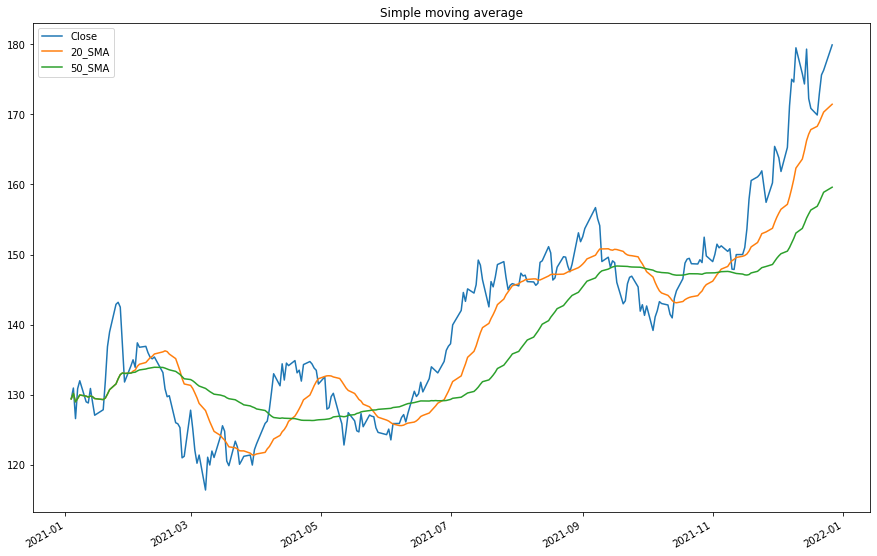

In [32]:
data[['Close','20_SMA','50_SMA']].plot(figsize=(15,10),title='Simple moving average');

In [33]:
data['Long']=data['20_SMA'] > data['50_SMA']
data

,Open,Close,20_SMA,50_SMA,Return,Bench_bal,bench_peak,DD,Long
2021-01-04 00:00:00-05:00,133.570007,129.410004,129.410004,129.410004,0.968855,9688.552562,9688.552562,0.000000,False
2021-01-05 00:00:00-05:00,128.889999,130.949997,130.180000,130.180000,1.015983,9843.400841,9843.400841,0.000000,False
2021-01-06 00:00:00-05:00,127.625000,126.589996,128.983332,128.983332,0.991890,9763.573566,9843.400841,-79.827275,False
2021-01-07 00:00:00-05:00,128.360001,130.860001,129.452499,129.452499,1.019476,9953.733537,9953.733537,0.000000,False
2021-01-08 00:00:00-05:00,132.429993,131.990005,129.960001,129.960001,0.996678,9920.663119,9953.733537,-33.070418,False
...,...,...,...,...,...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240,1.012497,11036.946257,11421.568745,-384.622487,True
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840,1.008306,11128.623462,11421.568745,-292.945283,True
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240,1.014968,11295.193416,11421.568745,-126.375329,True
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840,1.002502,11323.454663,11421.568745,-98.114082,True


In [34]:
#calculate the daily strategy return
data['Strategy_return']=np.where(data.Long.shift(1)==True,data.Return,1.0)
data

,Open,Close,20_SMA,50_SMA,Return,Bench_bal,bench_peak,DD,Long,Strategy_return
2021-01-04 00:00:00-05:00,133.570007,129.410004,129.410004,129.410004,0.968855,9688.552562,9688.552562,0.000000,False,1.000000
2021-01-05 00:00:00-05:00,128.889999,130.949997,130.180000,130.180000,1.015983,9843.400841,9843.400841,0.000000,False,1.000000
2021-01-06 00:00:00-05:00,127.625000,126.589996,128.983332,128.983332,0.991890,9763.573566,9843.400841,-79.827275,False,1.000000
2021-01-07 00:00:00-05:00,128.360001,130.860001,129.452499,129.452499,1.019476,9953.733537,9953.733537,0.000000,False,1.000000
2021-01-08 00:00:00-05:00,132.429993,131.990005,129.960001,129.960001,0.996678,9920.663119,9953.733537,-33.070418,False,1.000000
...,...,...,...,...,...,...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240,1.012497,11036.946257,11421.568745,-384.622487,True,1.012497
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840,1.008306,11128.623462,11421.568745,-292.945283,True,1.008306
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240,1.014968,11295.193416,11421.568745,-126.375329,True,1.014968
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840,1.002502,11323.454663,11421.568745,-98.114082,True,1.002502


In [35]:
data['Strategy_bal']=Starting_balance*data.Strategy_return.cumprod()
data.tail()

,Open,Close,20_SMA,50_SMA,Return,Bench_bal,bench_peak,DD,Long,Strategy_return,Strategy_bal
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240,1.012497,11036.946257,11421.568745,-384.622487,True,1.012497,9979.504621
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840,1.008306,11128.623462,11421.568745,-292.945283,True,1.008306,10062.398300
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240,1.014968,11295.193416,11421.568745,-126.375329,True,1.014968,10213.009311
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840,1.002502,11323.454663,11421.568745,-98.114082,True,1.002502,10238.562868
2021-12-27 00:00:00-05:00,177.085007,179.910004,171.444498,159.605932,1.015953,11504.095167,11504.095167,0.000000,True,1.015953,10401.896339


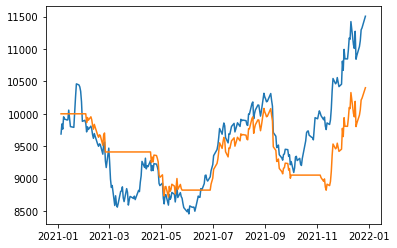

In [37]:
plt.plot(data.Bench_bal)
plt.plot(data.Strategy_bal)

plt.show()

In [38]:
#calculate metrics
sys_return = round(((data.Strategy_bal[-1] / data.Strategy_bal[0]) - 1) * 100, 2)
sys_return

4.02

In [39]:
#calculate drawdown
data['Strategy_peak'] = data.Strategy_bal.cummax()

data['Strategy_DD'] = data.Strategy_bal - data.Strategy_peak

sys_dd = round((((data.Strategy_DD / data.Strategy_peak).min()) * 100), 2)
sys_dd

-12.85

In [40]:
data

,Open,Close,20_SMA,50_SMA,Return,Bench_bal,bench_peak,DD,Long,Strategy_return,Strategy_bal,Strategy_peak,Strategy_DD
2021-01-04 00:00:00-05:00,133.570007,129.410004,129.410004,129.410004,0.968855,9688.552562,9688.552562,0.000000,False,1.000000,10000.000000,10000.000000,0.000000
2021-01-05 00:00:00-05:00,128.889999,130.949997,130.180000,130.180000,1.015983,9843.400841,9843.400841,0.000000,False,1.000000,10000.000000,10000.000000,0.000000
2021-01-06 00:00:00-05:00,127.625000,126.589996,128.983332,128.983332,0.991890,9763.573566,9843.400841,-79.827275,False,1.000000,10000.000000,10000.000000,0.000000
2021-01-07 00:00:00-05:00,128.360001,130.860001,129.452499,129.452499,1.019476,9953.733537,9953.733537,0.000000,False,1.000000,10000.000000,10000.000000,0.000000
2021-01-08 00:00:00-05:00,132.429993,131.990005,129.960001,129.960001,0.996678,9920.663119,9953.733537,-33.070418,False,1.000000,10000.000000,10000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20 00:00:00-05:00,167.812897,169.910004,168.297999,156.889240,1.012497,11036.946257,11421.568745,-384.622487,True,1.012497,9979.504621,10327.276713,-347.772092
2021-12-21 00:00:00-05:00,171.554993,172.979996,168.892999,157.492840,1.008306,11128.623462,11421.568745,-292.945283,True,1.008306,10062.398300,10327.276713,-264.878413
2021-12-22 00:00:00-05:00,173.039993,175.630005,169.603999,158.176240,1.014968,11295.193416,11421.568745,-126.375329,True,1.014968,10213.009311,10327.276713,-114.267402
2021-12-23 00:00:00-05:00,175.850006,176.289993,170.321498,158.882840,1.002502,11323.454663,11421.568745,-98.114082,True,1.002502,10238.562868,10327.276713,-88.713845


In [41]:
print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'Strategy Total return: {sys_return}%')
print(f'Strategy DD: {sys_dd}%')

Benchmark Total return: 18.74%
Benchmark DD: -19.17%

Strategy Total return: 4.02%
Strategy DD: -12.85%


## TRAIN MODEL

### Create train and test

In [73]:
stock_price=pd.DataFrame(data['Close'])
stock_price

,Close
2021-01-04 00:00:00-05:00,129.410004
2021-01-05 00:00:00-05:00,130.949997
2021-01-06 00:00:00-05:00,126.589996
2021-01-07 00:00:00-05:00,130.860001
2021-01-08 00:00:00-05:00,131.990005
...,...
2021-12-20 00:00:00-05:00,169.910004
2021-12-21 00:00:00-05:00,172.979996
2021-12-22 00:00:00-05:00,175.630005
2021-12-23 00:00:00-05:00,176.289993


In [74]:
# Get date array 
timesteps = stock_price.index.to_numpy()
prices = stock_price["Close"].to_numpy()

* We need to split our historical data to have a dataset that reflects the past (train set) and a dataset that reflects the future (test set).

In [75]:
# Create train and test splits the right way for time series data
size=int(0.8*len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train,y_train=timesteps[:size],prices[:size]
X_test,y_test=timesteps[size:],prices[size:]

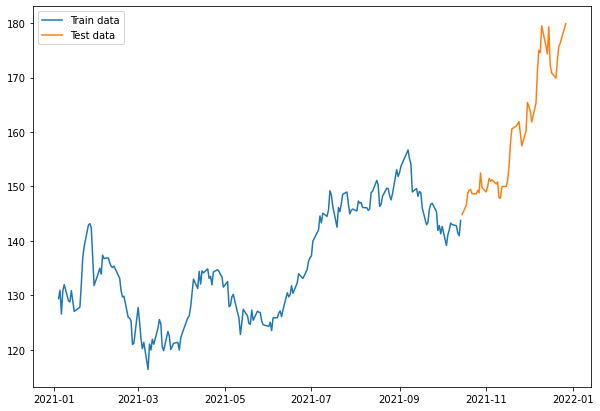

In [79]:
# Let's visualize the right data
plt.figure(figsize=(10,7))
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
plt.legend(['Train data','Test data'])
plt.show()

In [77]:
def predict_one_day(x,horizon=1):
    return x[:,:-horizon],x[:,-horizon:]

In [72]:
# Create function to view NumPy arrays as windows 
def make_windows(x,window_size,horizon=1):
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    # 4. Get the labelled windows
    windows, labels = predict_one_day(windowed_array, horizon=horizon)
    return windows,labels

In [64]:
full_windows, full_labels = make_windows(prices, window_size=20, horizon=1)
len(full_windows),len(full_labels)

(228, 228)

### Turning windows into training and test sets

In [65]:
def make_train_test_split(windows,labels):
    split_size=int(0.8*len(windows))
    window_trains=windows[:split_size]
    window_tests=windows[split_size:]
    label_trains=labels[:split_size]
    label_tests=labels[split_size:]

    return window_trains,window_tests,label_trains,label_tests

In [66]:
window_trains,window_tests,label_trains,label_tests= make_train_test_split(full_windows,full_labels)

In [67]:
import tensorflow as tf

In [68]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
],name="model_1_dense")

model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model.fit(x=window_trains,  
            y=label_trains,  
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(window_tests, label_tests))

Epoch 1/100
2/2 [==============================] - 1s 209ms/step - loss: 48.6725 - mae: 48.6725 - val_loss: 10.4381 - val_mae: 10.4381
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 11.6616 - mae: 11.6616 - val_loss: 25.7159 - val_mae: 25.7159
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 17.9016 - mae: 17.9016 - val_loss: 28.7098 - val_mae: 28.7098
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 17.9706 - mae: 17.9706 - val_loss: 15.3282 - val_mae: 15.3282
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 7.2453 - mae: 7.2453 - val_loss: 4.2948 - val_mae: 4.2948
Epoch 6/100
2/2 [==============================] - 0s 51ms/step - loss: 9.0399 - mae: 9.0399 - val_loss: 6.3756 - val_mae: 6.3756
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 10.1310 - mae: 10.1310 - val_loss: 3.9561 - val_mae: 3.9561
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss:

In [69]:
# Evaluate model
model.evaluate(window_tests,label_tests)

2/2 [==============================] - 0s 3ms/step - loss: 3.3323 - mae: 3.3323


[3.33229398727417, 3.33229398727417]

In [70]:
def make_preds(model, input_data):
    
    

  
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [71]:
# Make predictions using model_1 on the test dataset and view the results
model_preds = make_preds(model, window_tests)
len(model_preds), model_preds[:10]

(46,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([146.55809, 146.45601, 148.0758 , 148.17384, 149.59782, 148.58977,
        149.48473, 149.08206, 149.17482, 149.8473 ], dtype=float32)>)

In [72]:
def mean_absolute_squared_error(y_true,y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))

    # mae for naive forecast
    mae_forecast=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

    return mae/mae_forecast

In [73]:
def make_results(y_true,y_pred):
    
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse=tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase=mean_absolute_squared_error(y_true,y_pred)
    
    return {'mae':mae.numpy(),
            'mse':mse.numpy(),
            'rmse':rmse.numpy(),
            'mape':mape.numpy(),
            'mase':mase.numpy()}

In [74]:
# Evaluate preds
model_results = make_results(y_true=tf.squeeze(label_tests), # reduce to right shape
                                 y_pred=model_preds.numpy())
model_results

{'mae': 3.3322933,
 'mse': 19.596838,
 'rmse': 4.4268317,
 'mape': 2.0028665,
 'mase': 1.5877613268703157}